#Install Dependencies

In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 16559, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 16559 (delta 18), reused 29 (delta 13), pack-reused 16522
Receiving objects: 100% (16559/16559), 15.06 MiB | 12.89 MiB/s, done.
Resolving deltas: 100% (11371/11371), done.
/content/yolov5
HEAD is now at 064365d8 Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.1 MB/s eta 0:00:00
Setup complete. Using torch 2.2.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40)


## Download a Dataset


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DMaJ42djp166lZBD0a4V")
project = rf.workspace("face-mask-4ehkw").project("facemaskdetection-b2nbk")
version = project.version(1)
dataset = version.download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FaceMaskDetection-1 in yolov5pytorch:: 100%|██████████| 2348/2348 [00:00<00:00, 8576.46it/s]


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- withMask
- withoutMask
nc: 2
roboflow:
  license: CC BY 4.0
  project: facemaskdetection-b2nbk
  url: https://universe.roboflow.com/face-mask-4ehkw/facemaskdetection-b2nbk/dataset/1
  version: 1
  workspace: face-mask-4ehkw
test: ../test/images
train: FaceMaskDetection-1/train/images
val: FaceMaskDetection-1/valid/images


# Define Model Configuration and Architecture

In [ ]:
# define number of classes based on YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
import yaml

# Load the data.yaml file to get the number of classes
with open(f"{dataset.location}/data.yaml", 'r') as stream:
    num_classes = yaml.safe_load(stream)['nc']

# Load the model configuration file
with open('/content/yolov5/models/yolov5s.yaml', 'r') as file:
    model_config = yaml.safe_load(file)

# Update the number of classes to match your dataset
model_config['nc'] = num_classes

# Write the updated model configuration back to the file
with open('/content/yolov5/models/yolov5s.yaml', 'w') as file:
    yaml.dump(model_config, file, sort_keys=False)

# Print the updated model configuration
with open('/content/yolov5/models/yolov5s.yaml', 'r') as file:
    updated_config = file.read()
    print(updated_config)

nc: 2
depth_multiple: 0.33
width_multiple: 0.5
anchors:
- - 10
  - 13
  - 16
  - 30
  - 33
  - 23
- - 30
  - 61
  - 62
  - 45
  - 59
  - 119
- - 116
  - 90
  - 156
  - 198
  - 373
  - 326
backbone:
- - -1
  - 1
  - Conv
  - - 64
    - 6
    - 2
    - 2
- - -1
  - 1
  - Conv
  - - 128
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 128
- - -1
  - 1
  - Conv
  - - 256
    - 3
    - 2
- - -1
  - 6
  - C3
  - - 256
- - -1
  - 1
  - Conv
  - - 512
    - 3
    - 2
- - -1
  - 9
  - C3
  - - 512
- - -1
  - 1
  - Conv
  - - 1024
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 1024
- - -1
  - 1
  - SPPF
  - - 1024
    - 5
head:
- - -1
  - 1
  - Conv
  - - 512
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 6
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 512
    - false
- - -1
  - 1
  - Conv
  - - 256
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 4
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 256
    - fals

In [ ]:
#this is the model configuration we will use for our tutorial
%cat /content/yolov5/models/yolov5s.yaml

nc: 2
depth_multiple: 0.33
width_multiple: 0.5
anchors:
- - 10
  - 13
  - 16
  - 30
  - 33
  - 23
- - 30
  - 61
  - 62
  - 45
  - 59
  - 119
- - 116
  - 90
  - 156
  - 198
  - 373
  - 326
backbone:
- - -1
  - 1
  - Conv
  - - 64
    - 6
    - 2
    - 2
- - -1
  - 1
  - Conv
  - - 128
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 128
- - -1
  - 1
  - Conv
  - - 256
    - 3
    - 2
- - -1
  - 6
  - C3
  - - 256
- - -1
  - 1
  - Conv
  - - 512
    - 3
    - 2
- - -1
  - 9
  - C3
  - - 512
- - -1
  - 1
  - Conv
  - - 1024
    - 3
    - 2
- - -1
  - 3
  - C3
  - - 1024
- - -1
  - 1
  - SPPF
  - - 1024
    - 5
head:
- - -1
  - 1
  - Conv
  - - 512
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 6
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 512
    - false
- - -1
  - 1
  - Conv
  - - 256
    - 1
    - 1
- - -1
  - 1
  - nn.Upsample
  - - None
    - 2
    - nearest
- - - -1
    - 4
  - 1
  - Concat
  - - 1
- - -1
  - 3
  - C3
  - - 256
    - fals

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# Train Custom YOLOv5 Detector

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance

%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data /content/FaceMaskDetection-1/data.yaml --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results --cache

/content/yolov5
2024-04-18 11:35:00.869926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 11:35:00.869976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 11:35:00.871437: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-18 11:35:01.950274: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=, cfg=./models/custom_yolov5s.yaml, data=/content/FaceMaskDetection-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, no

# Evaluate Custom YOLOv5 Detector Performance

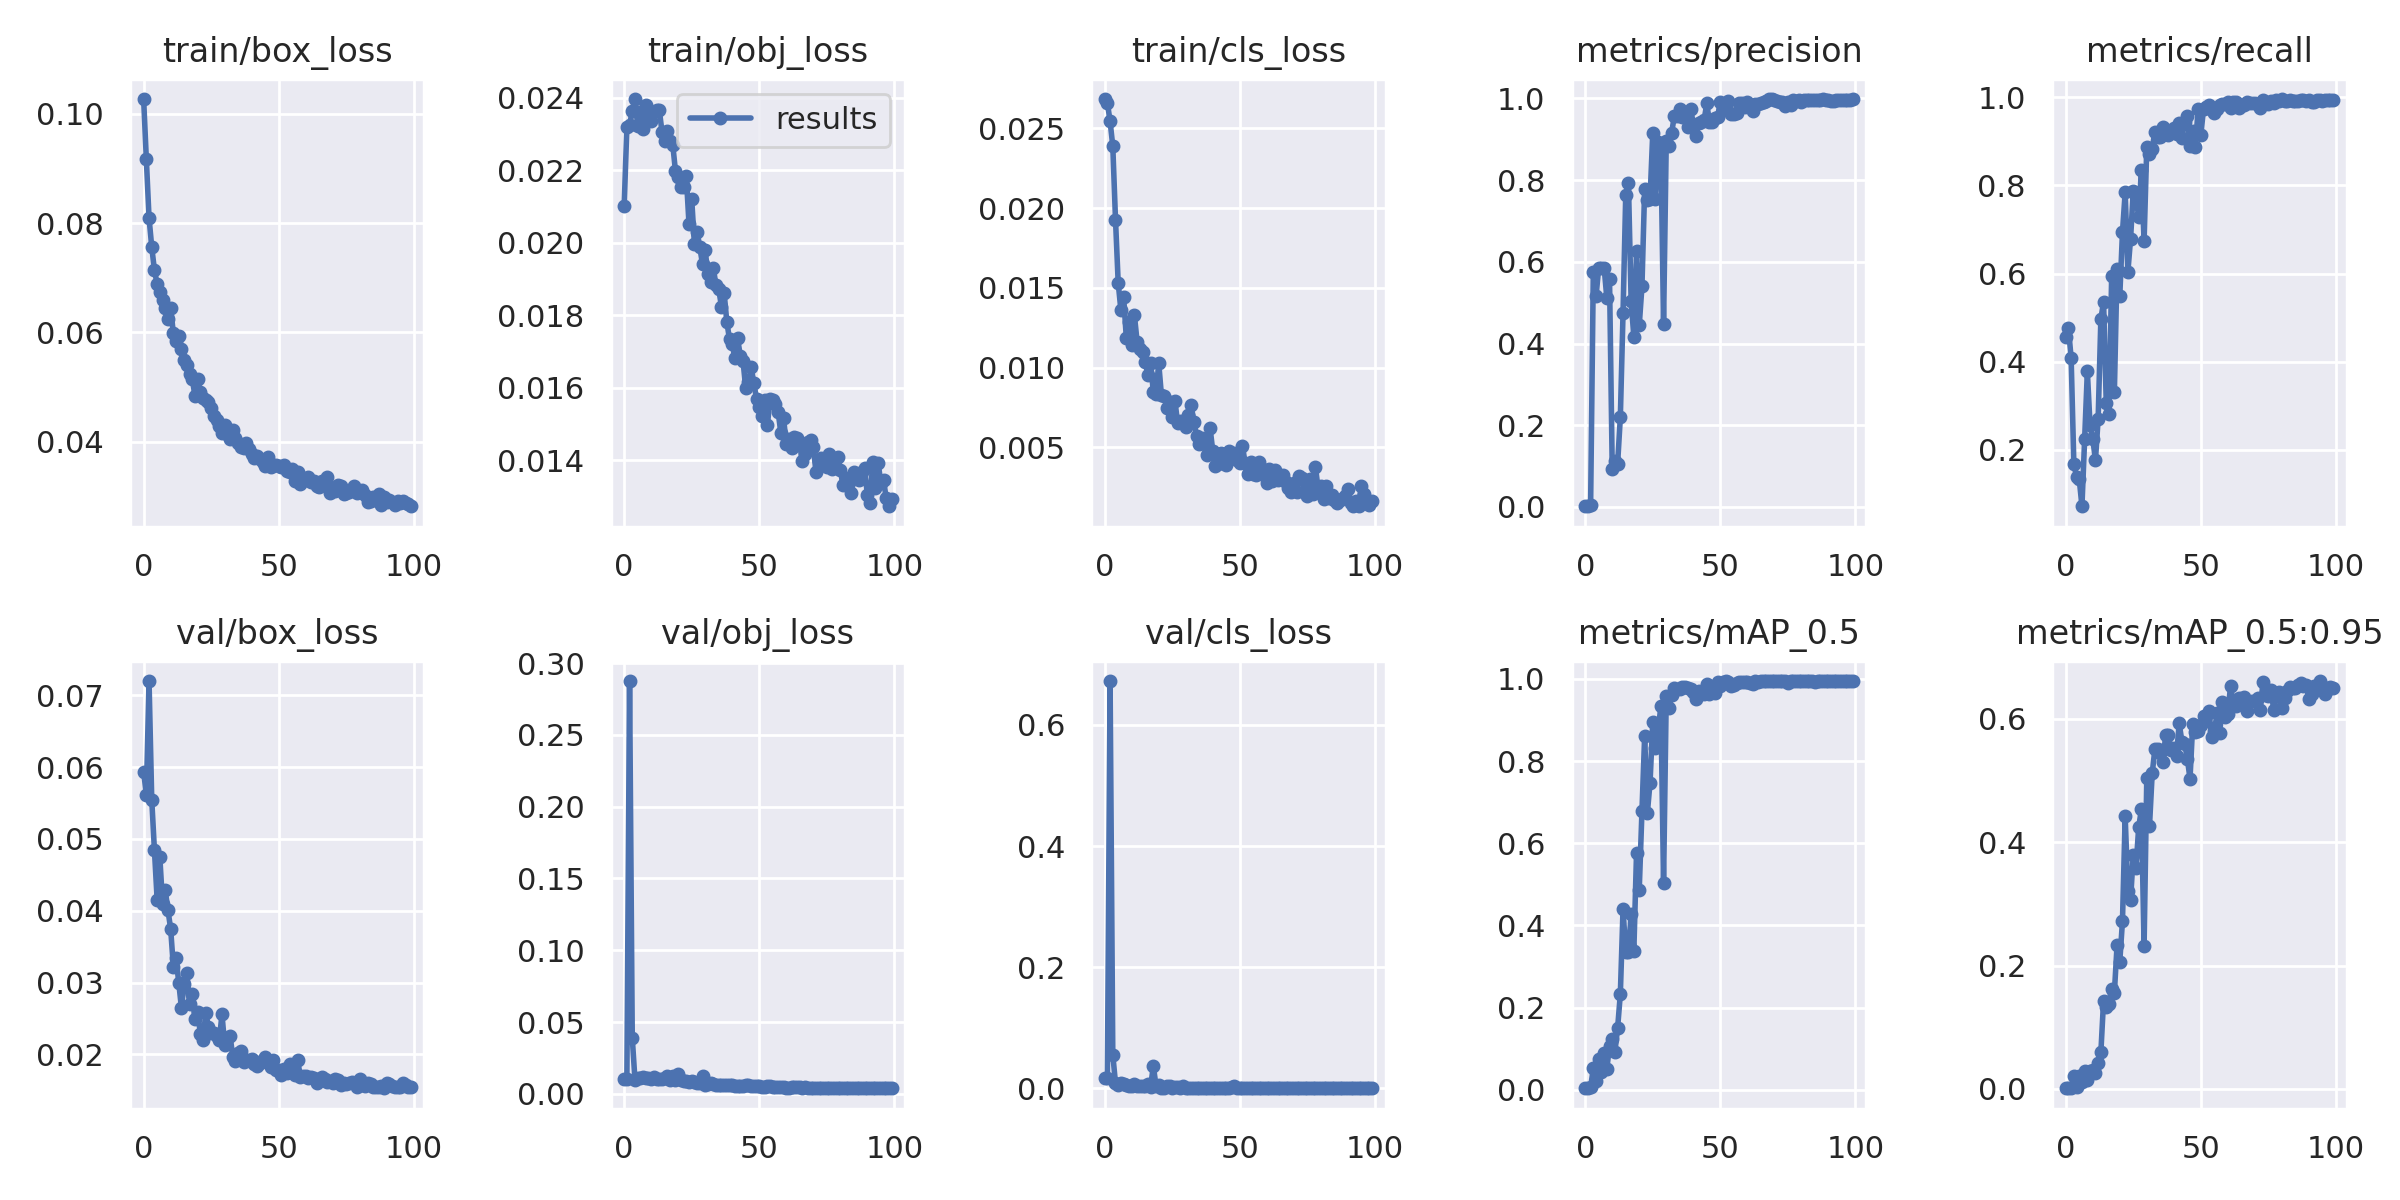

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
from IPython.display import Image
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)  # view results.png

Visualize Our Training Data with Labels


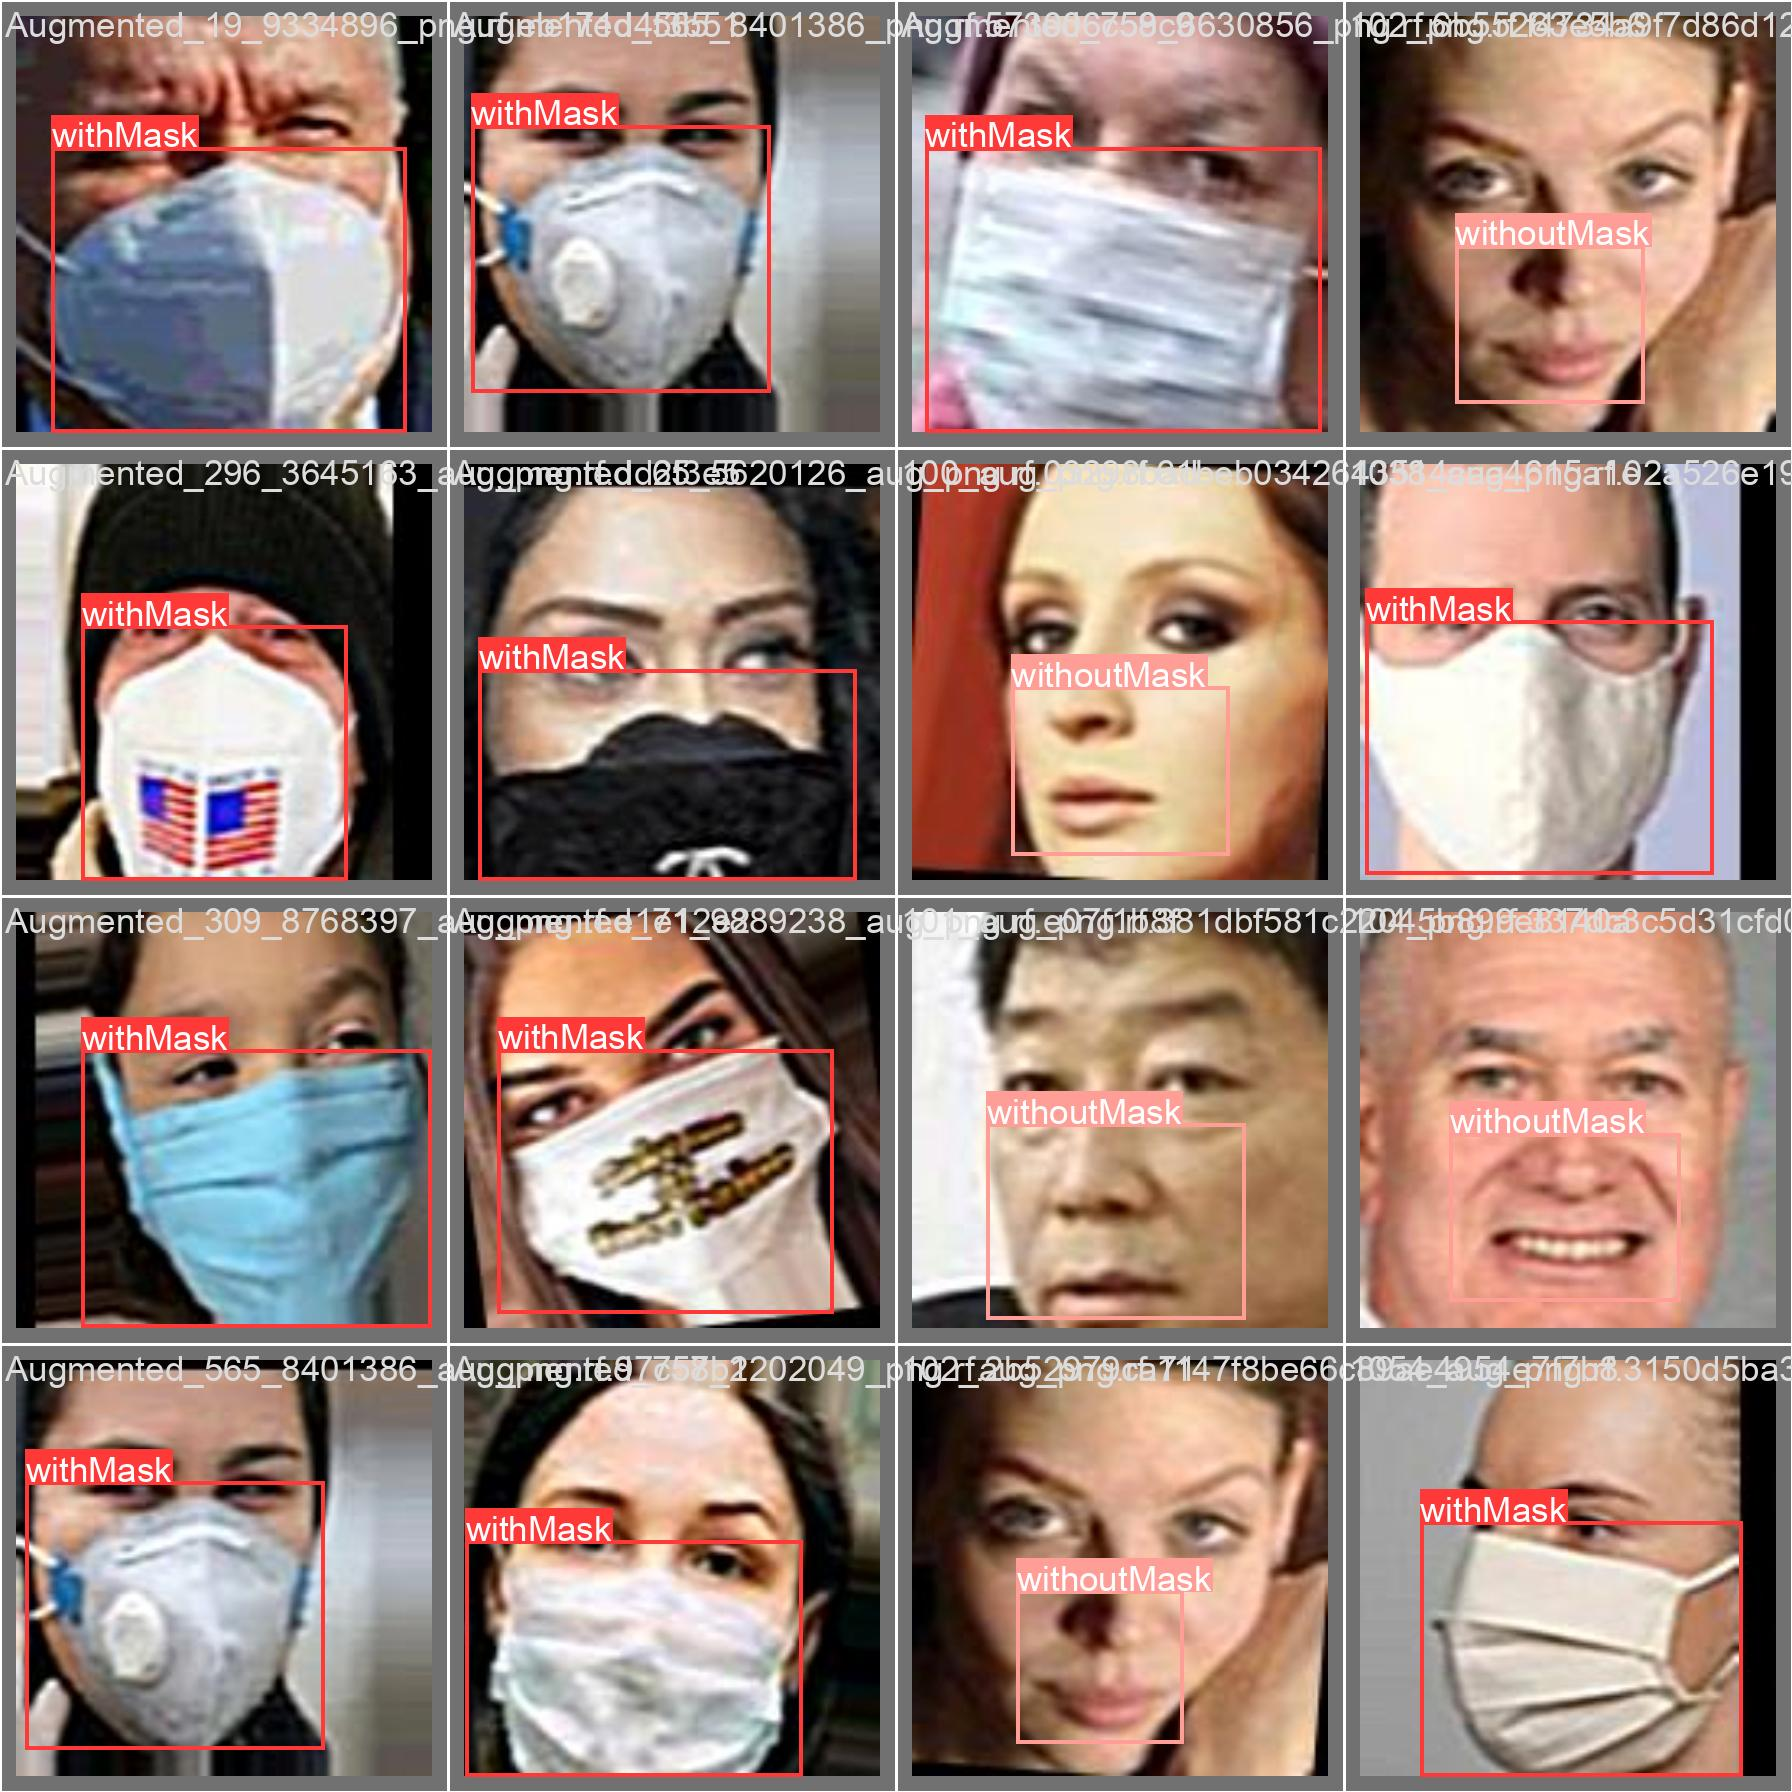

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


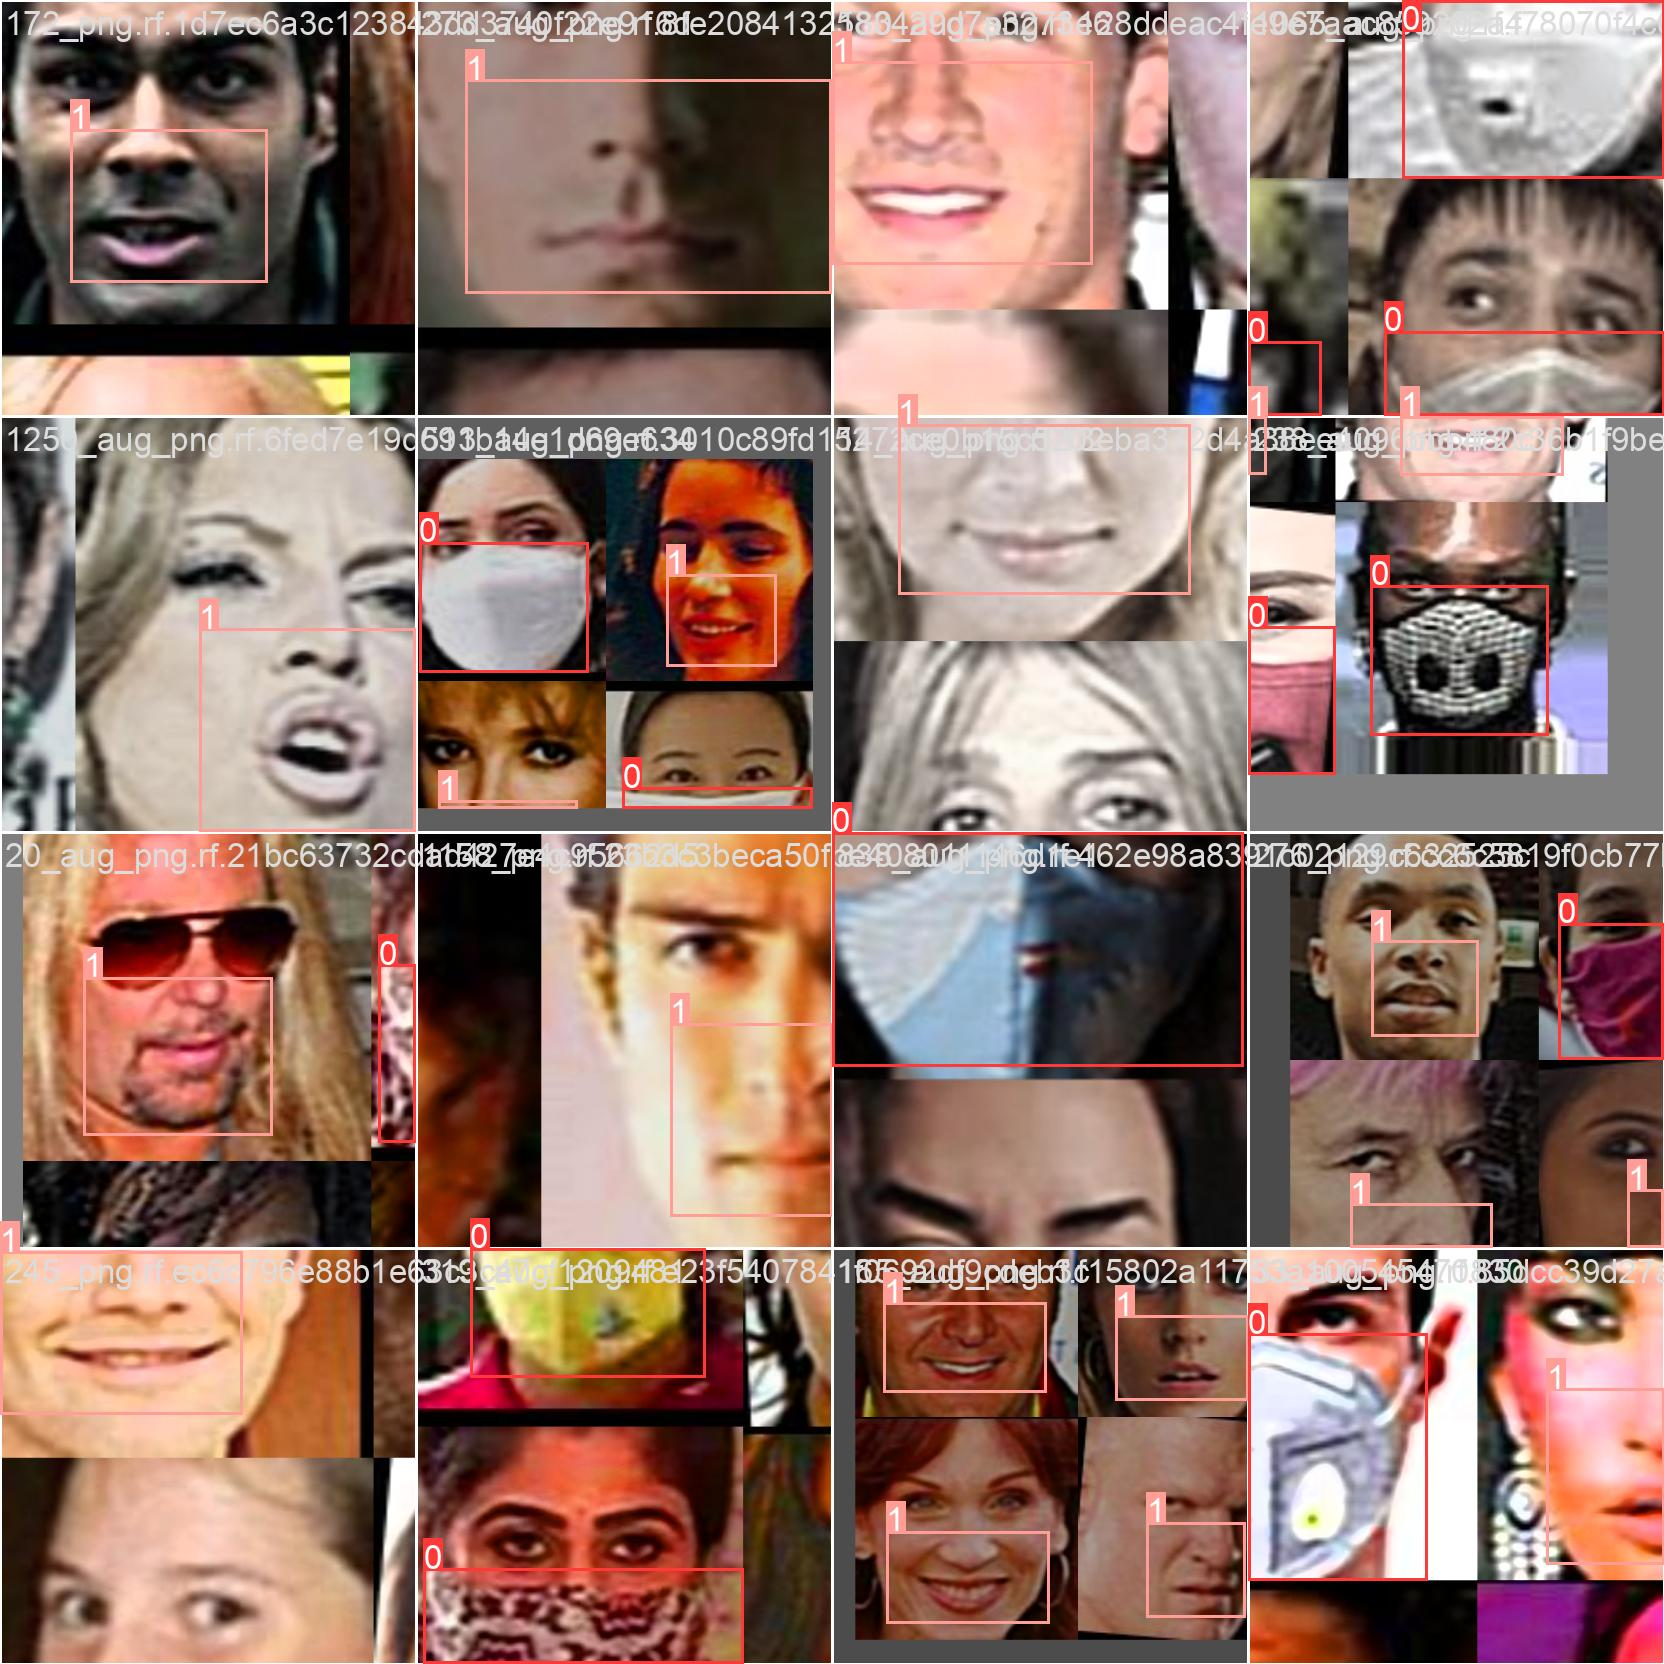

In [ ]:
# print out an augmented training example
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results/train_batch0.jpg', width=900)

# Run Inference With Trained Weights


In [ ]:
# trained weights are saved by default in our weights folder
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.4 --source /content/FaceMaskDetection-1/test/images

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=/content/FaceMaskDetection-1/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d8 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7249215 parameters, 0 gradients
image 1/117 /content/FaceMaskDetection-1/test/images/1059_aug_png.rf.32223bbfbdbcdf708fbe71f8afb926bc.jpg: 416x416 1 withMask, 7.6ms
image 2/117 /content/FaceMaskDetection-1/test/images/1063_aug_png.rf.08f06702ffe897fcfd36ee4106613009.jpg: 416x416 (no detections), 7.7ms
image 3/117 /content/FaceMaskDe

In [ ]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report

# Actual labels from your dataset for the test folder of images
actual_labels = [
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withMask", "withoutMask", "withoutMask", "withMask", "withoutMask",
    "withMask", "withMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withMask", "withMask", "withoutMask", "withMask",
    "withMask", "withMask", "withMask", "withoutMask", "withMask",
    "withMask", "withMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withMask", "withoutMask", "withMask", "withMask", "withoutMask", "withMask",
    "withoutMask", "withMask", "withMask", "withMask", "withMask", "withMask",
    "withoutMask", "withoutMask", "withoutMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withMask", "withoutMask", "withMask", "withoutMask",
    "withMask", "withoutMask", "withMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withMask", "withMask",
    "withMask", "withMask", "withMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withMask", "withoutMask", "withMask", "withMask", "withoutMask"
]

# Predicted labels on the test step from YOLOv5 model
predicted_labels = [
    "withMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withMask", "withoutMask", "withoutMask", "withMask", "withoutMask",
    "withoutMask", "withMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withMask", "withMask", "withoutMask", "withMask",
    "withMask", "withMask", "withMask", "withoutMask", "withMask",
    "withMask", "withMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withMask", "withoutMask", "withMask", "withMask", "withoutMask", "withMask",
    "withoutMask", "withMask", "withMask", "withMask", "withMask", "withMask",
    "withoutMask", "withoutMask", "withoutMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withMask", "withoutMask", "withMask", "withoutMask",
    "withMask", "withoutMask", "withMask", "withoutMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withMask", "withMask",
    "withMask", "withMask", "withMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withMask", "withMask", "withoutMask",
    "withoutMask", "withoutMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withMask", "withoutMask", "withoutMask", "withoutMask",
    "withoutMask", "withMask", "withoutMask", "withMask", "withMask", "withoutMask"
]

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(actual_labels, predicted_labels, target_names=["withoutMask", "withMask"])
print(report)


Accuracy: 0.98
              precision    recall  f1-score   support

 withoutMask       0.98      0.98      0.98        49
    withMask       0.99      0.99      0.99        75

    accuracy                           0.98       124
   macro avg       0.98      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124

